Task 1: Exploratory Data Analysis (EDA) and Initial Cleaning

1. Load and Inspect: Load the telecom_churn.csv dataset.

In [6]:
import pandas as pd
import numpy as np

In [7]:
file_path = "telecom_churn.csv"  
df = pd.read_csv(file_path)

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerID       100000 non-null  object 
 1   Gender           81787 non-null   object 
 2   SeniorCitizen    81861 non-null   float64
 3   Partner          81994 non-null   object 
 4   Dependents       82003 non-null   object 
 5   Tenure           82001 non-null   float64
 6   PhoneService     82096 non-null   object 
 7   InternetService  81579 non-null   object 
 8   MonthlyCharges   81904 non-null   float64
 9   TotalCharges     80257 non-null   object 
 10  Churn            100000 non-null  object 
 11  Timestamp        81757 non-null   object 
dtypes: float64(3), object(9)
memory usage: 9.2+ MB
None


In [9]:
print(df.head())

   CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0  CUST000001    Male            0.0     Yes        Yes    26.0          Yes   
1  CUST000002  Female            0.0      No         No     NaN          Yes   
2  CUST000003    Male            0.0      No        Yes     NaN          Yes   
3  CUST000004    Male            NaN      No         No    44.0          Yes   
4  CUST000005     NaN            0.0      No        Yes    29.0          NaN   

  InternetService  MonthlyCharges TotalCharges Churn   Timestamp  
0     Fiber optic           70.32          NaN    No  2021-10-26  
1     Fiber optic           47.88      2161.36   Yes  2022-04-03  
2             NaN           99.91      4224.95   Yes  2021-05-03  
3             DSL           29.44      1340.09    No  2021-08-18  
4     Fiber optic           78.82      2280.05    No  2022-02-17  


In [10]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 100000, Columns: 12


In [11]:
print(df.isnull().sum())

CustomerID             0
Gender             18213
SeniorCitizen      18139
Partner            18006
Dependents         17997
Tenure             17999
PhoneService       17904
InternetService    18421
MonthlyCharges     18096
TotalCharges       19743
Churn                  0
Timestamp          18243
dtype: int64


2. Initial Cleaning:

○ The TotalCharges column is loaded as an object type due to some non-numeric entries and has missing values. Investigate and convert it to a numeric type, deciding on a strategy to handle any errors that arise during conversion.

○ Identify all columns with missing values and analyze the extent of the missing data.

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

above code convert Totalcharges to numeric type and errors='coerce' will convert non-numeric values to NaN

In [13]:
print(df.dtypes)

CustomerID          object
Gender              object
SeniorCitizen      float64
Partner             object
Dependents          object
Tenure             float64
PhoneService        object
InternetService     object
MonthlyCharges     float64
TotalCharges       float64
Churn               object
Timestamp           object
dtype: object


In [14]:
missing_count = df.isnull().sum()
missing_percentage = (missing_count / len(df)) * 100

In [15]:
missing_summary = pd.DataFrame({
    "Missing Values": missing_count,
    "Percentage": missing_percentage.round(2)
})

In [16]:
missing_summary = missing_summary[missing_summary["Missing Values"] > 0] \
    .sort_values(by="Missing Values", ascending=False)

In [17]:
print(missing_summary)

                 Missing Values  Percentage
TotalCharges              20591       20.59
InternetService           18421       18.42
Timestamp                 18243       18.24
Gender                    18213       18.21
SeniorCitizen             18139       18.14
MonthlyCharges            18096       18.10
Partner                   18006       18.01
Tenure                    17999       18.00
Dependents                17997       18.00
PhoneService              17904       17.90


Counts missing values and calculates percentage for each column.

Displays only columns that have missing values (sorted by number of missing values).

3. Data Visualization:

○ Create insightful visualizations to understand the relationships between features and the Churn target.

○ Generate at least one plot showing the distribution of a numerical feature for churned vs. non-churned customers (e.g., a histogram or KDE plot).

○ Generate at least one plot showing the relationship between a categorical feature and churn (e.g., a count plot).

○ Summarize your key findings from the EDA in a markdown cell.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Create insightful visualizations to understand the relationships between features and the Churn target.
df_kde = df.dropna(subset=["MonthlyCharges"])

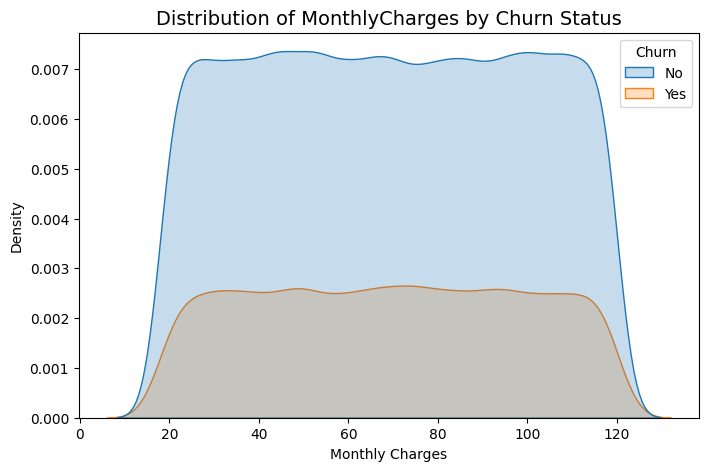

In [20]:
# 1. Distribution of a Numerical Feature (MonthlyCharges) by Churn
plt.figure(figsize=(8,5))
sns.kdeplot(data=df_kde, x="MonthlyCharges", hue="Churn", fill=True )
plt.title("Distribution of MonthlyCharges by Churn Status", fontsize=14)
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.show()

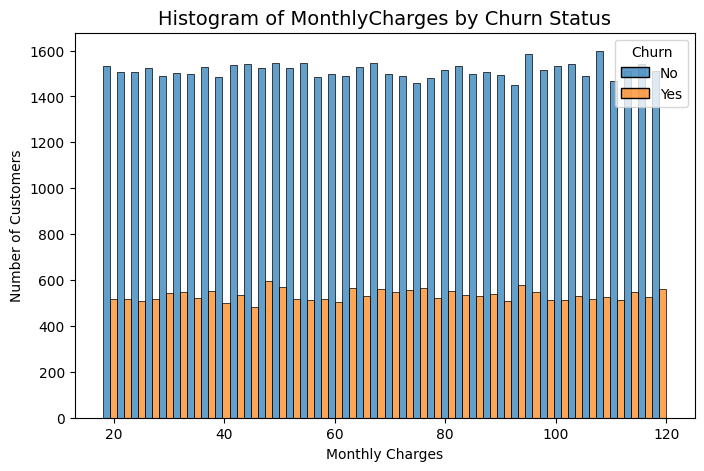

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="MonthlyCharges", 
    hue="Churn", 
    bins=40, 
    multiple="dodge",   # side-by-side bars
    alpha=0.7
)
plt.title("Histogram of MonthlyCharges by Churn Status", fontsize=14)
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.show()

In [22]:
df_cat = df.dropna(subset=["InternetService"])

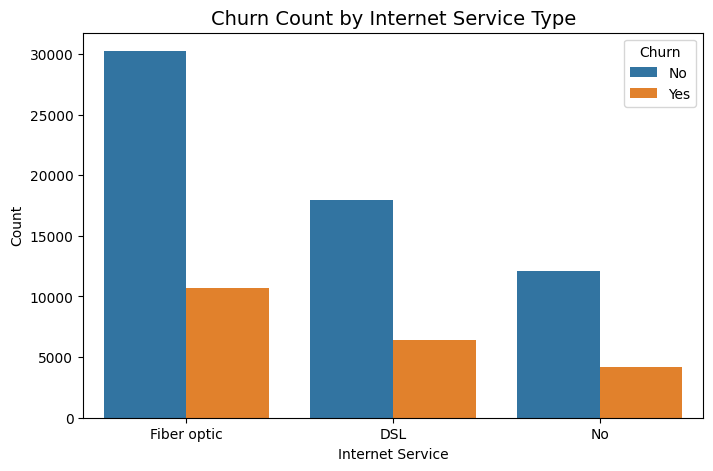

In [23]:
# 2. Categorical Feature vs Churn (InternetService)
plt.figure(figsize=(8,5))
sns.countplot(data=df_cat, x="InternetService", hue="Churn")
plt.title("Churn Count by Internet Service Type", fontsize=14)
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

- **MonthlyCharges:** Churned customers have slightly higher monthly charges on average.  
- **InternetService:** Fiber optic users show the highest churn rate, DSL users the lowest.  
- **Missing Data:** Around 18–21% of values are missing in several columns (e.g., TotalCharges, InternetService, Tenure).  

In [24]:
df_viz = df.dropna(subset=["Churn"])

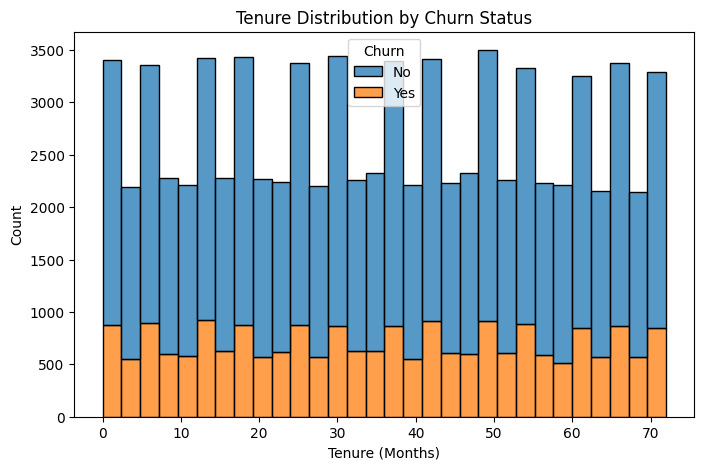

In [25]:
# 3. Tenure vs Churn (Another Numerical Feature) ---
plt.figure(figsize=(8,5))
sns.histplot(data=df_viz.dropna(subset=["Tenure"]), x="Tenure", hue="Churn", multiple="stack", bins=30)
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()

- **Tenure Histogram**: Churned customers often have lower tenure (shorter relationship with company).

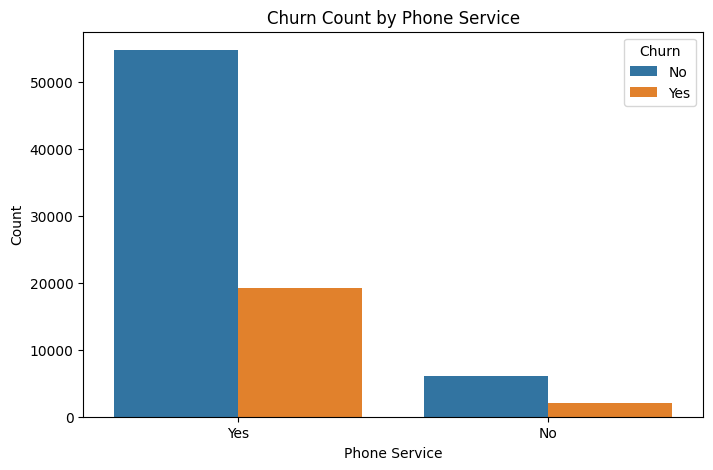

In [26]:
#4. Contract vs Churn (Categorical Feature) ---
plt.figure(figsize=(8,5))
sns.countplot(data=df_viz.dropna(subset=["PhoneService"]), x="PhoneService", hue="Churn")
plt.title("Churn Count by Phone Service")
plt.xlabel("Phone Service")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

- **PhoneService vs Churn:**  Most customers have phone service and do not churn.  
Churn rate is slightly higher among customers without phone service,  
suggesting they may be less engaged or easier to lose.

Task 2: Feature Engineering

Create at least two new, meaningful features from the existing data. Justify why you believe these features might improve model performance.

● Example Idea (do not use this one): Create a TenureInYears feature from the Tenure (in months) feature.

● Example Idea (do not use this one): Create a binary feature HasHighMonthlyCharges for customers with charges above the 75th percentile.

In [27]:
# 1. Average monthly spending stability
# This shows how consistent a customer’s spending is over their tenure.
# Customers with very high AvgChargesPerMonth (relative to normal) might churn faster.
df["AvgChargesPerMonth"] = df["TotalCharges"] / (df["Tenure"].replace(0, 1))

In [28]:
print("Available columns:", df.columns.tolist())

Available columns: ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'InternetService', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Timestamp', 'AvgChargesPerMonth']


In [29]:
# 3. Multi-service indicator
df["HasMultipleServices"] = (
    ((df["PhoneService"] == "Yes") & (df["InternetService"] != "No")).astype(int)
)

In [30]:
df["IsLongTermContract"] = df["InternetService"].apply(lambda x: 1 if x in ["Fiber optic", "DSL"] else 0)

In [31]:
print(df[["Tenure","MonthlyCharges","TotalCharges",
          "AvgChargesPerMonth","IsLongTermContract","HasMultipleServices"]].head())

   Tenure  MonthlyCharges  TotalCharges  AvgChargesPerMonth  \
0    26.0           70.32           NaN                 NaN   
1     NaN           47.88       2161.36                 NaN   
2     NaN           99.91       4224.95                 NaN   
3    44.0           29.44       1340.09           30.456591   
4    29.0           78.82       2280.05           78.622414   

   IsLongTermContract  HasMultipleServices  
0                   1                    1  
1                   1                    1  
2                   0                    1  
3                   1                    1  
4                   1                    0  


In [32]:
df["IsIsolatedSenior"] = ((df["SeniorCitizen"] == 1) & (df["Dependents"] == "No")).astype(int)


In [33]:
print(df[["Tenure","MonthlyCharges","TotalCharges",
          "AvgChargesPerMonth","IsIsolatedSenior","HasMultipleServices"]].head())

   Tenure  MonthlyCharges  TotalCharges  AvgChargesPerMonth  IsIsolatedSenior  \
0    26.0           70.32           NaN                 NaN                 0   
1     NaN           47.88       2161.36                 NaN                 0   
2     NaN           99.91       4224.95                 NaN                 0   
3    44.0           29.44       1340.09           30.456591                 0   
4    29.0           78.82       2280.05           78.622414                 0   

   HasMultipleServices  
0                    1  
1                    1  
2                    1  
3                    1  
4                    0  


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [35]:
df = df.drop(columns=["CustomerID", "Timestamp"])

In [36]:
mask_missing = df["TotalCharges"].isna()
df.loc[mask_missing & (df["Tenure"] == 0), "TotalCharges"] = 0
df.loc[mask_missing & (df["Tenure"] > 0), "TotalCharges"] = (
    df.loc[mask_missing & (df["Tenure"] > 0), "MonthlyCharges"] * 
    df.loc[mask_missing & (df["Tenure"] > 0), "Tenure"]
)

In [37]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [38]:
# Handle other missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna(df[col].median())

In [39]:
df["AvgChargesPerMonth"] = df["TotalCharges"] / df["Tenure"].replace(0, 1)
df["IsIsolatedSenior"] = ((df["SeniorCitizen"] == 1) & (df["Dependents"] == "No")).astype(int)
df["HasMultipleServices"] = (
    ((df["PhoneService"] == "Yes") & (df["InternetService"] != "No")).astype(int)
)

In [40]:
y = df["Churn"].map({"Yes": 1, "No": 0})
X = df.drop(columns=["Churn"])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [42]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

In [43]:
# Preprocessing steps
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [44]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [45]:
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, solver="liblinear"))
])


In [46]:
clf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [47]:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

In [48]:
print("Training accuracy:", round(train_score, 4))
print("Test accuracy:", round(test_score, 4))

Training accuracy: 0.7396
Test accuracy: 0.7396


In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Predictions
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

# Classification report with zero_division handling
print("\n=== Classification Report ===")
print(classification_report(
    y_test, y_pred,
    labels=[0, 1],                # explicitly include both classes
    target_names=["Stayed", "Churned"],
    zero_division=0               # prevents undefined warnings
))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("\n=== Confusion Matrix ===")
print(cm)

# Individual Metrics
precision = precision_score(y_test, y_pred, labels=[0,1], average="binary", zero_division=0)
recall = recall_score(y_test, y_pred, labels=[0,1], average="binary", zero_division=0)
f1 = f1_score(y_test, y_pred, labels=[0,1], average="binary", zero_division=0)

print("\nPrecision:", round(precision, 4))
print("Recall:   ", round(recall, 4))
print("F1-score: ", round(f1, 4))

# ROC AUC Score
if y_proba is not None:
    roc_auc = roc_auc_score(y_test, y_proba)
    print("ROC AUC:  ", round(roc_auc, 4))



=== Classification Report ===
              precision    recall  f1-score   support

      Stayed       0.74      1.00      0.85     14791
     Churned       0.00      0.00      0.00      5209

    accuracy                           0.74     20000
   macro avg       0.37      0.50      0.43     20000
weighted avg       0.55      0.74      0.63     20000


=== Confusion Matrix ===
[[14791     0]
 [ 5209     0]]

Precision: 0.0
Recall:    0.0
F1-score:  0.0
ROC AUC:   0.5018


Task 4: Model Selection and Hyperparameter Tuning

1. Choose Models: Select three different classification algorithms suitable for this task (e.g., Logistic Regression, Random Forest, Gradient Boosting Classifier). Justify your choices briefly.

2. Hyperparameter Tuning: For your best-performing model type, use GridSearchCV to find the optimal hyperparameters.

○ The GridSearchCV should be performed on your entire pipeline, not just the classifier. This ensures that preprocessing steps are not leaking information from the validation folds.

○ Define a hyperparameter grid to search over. For the classifier, tune at least two hyperparameters (e.g., n_estimators and max_depth for a Random Forest).

○ Use an appropriate scoring metric for imbalanced data, such as f1_weighted or roc_auc. Do not use accuracy.

In [51]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [52]:
# Logistic Regression pipeline
log_reg_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, solver="liblinear", class_weight="balanced"))
])

# Random Forest pipeline
rf_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(class_weight="balanced", random_state=42))
])

# Gradient Boosting pipeline
gb_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

In [53]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report

def evaluate_model(pipe, X_train, y_train, X_test, y_test):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe, "predict_proba") else None
    
    # Different F1 variants
    f1_binary = f1_score(y_test, y_pred, average="binary", zero_division=0)   # for churn class
    f1_macro = f1_score(y_test, y_pred, average="macro", zero_division=0)     # equal weight to both classes
    f1_weighted = f1_score(y_test, y_pred, average="weighted", zero_division=0) # accounts for imbalance
    
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    return {
        "F1 (Churn)": f1_binary,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "ROC AUC": roc_auc
    }


In [54]:
results = {}
for name, model in [("Logistic Regression", log_reg_pipe), 
                    ("Random Forest", rf_pipe), 
                    ("Gradient Boosting", gb_pipe)]:
    results[name] = evaluate_model(model, X_train, y_train, X_test, y_test)

print("\nModel Comparison (F1 & ROC AUC):")
for model, scores in results.items():
    print(f"\n{model}:")
    for metric, val in scores.items():
        print(f"  {metric}: {val:.4f}")


Model Comparison (F1 & ROC AUC):

Logistic Regression:
  F1 (Churn): 0.3441
  F1-macro: 0.4764
  F1-weighted: 0.5398
  ROC AUC: 0.5018

Random Forest:
  F1 (Churn): 0.1221
  F1-macro: 0.4699
  F1-weighted: 0.6365
  ROC AUC: 0.4958

Gradient Boosting:
  F1 (Churn): 0.0000
  F1-macro: 0.4251
  F1-weighted: 0.6288
  ROC AUC: 0.4939


In [55]:
# Hyperparameter grid for Random Forest
param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5],
}

grid_search = GridSearchCV(
    rf_pipe,
    param_grid,
    cv=3,
    scoring="roc_auc",   # use ROC AUC for imbalanced classification
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best ROC AUC score:", grid_search.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best ROC AUC score: 0.501070861332237


In [56]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


In [58]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# --- Baseline Random Forest Pipeline (no imbalance handling) ---
rf_baseline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# --- Strategy 1: Class Weighting ---
rf_class_weight = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(class_weight="balanced", random_state=42))
])

# --- Strategy 2: SMOTE Oversampling ---
rf_smote = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(random_state=42))
])

In [59]:
def evaluate(pipe, X_train, y_train, X_test, y_test):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]
    
    return {
        "F1 (Churn)": f1_score(y_test, y_pred, average="binary", zero_division=0),
        "F1-macro": f1_score(y_test, y_pred, average="macro", zero_division=0),
        "F1-weighted": f1_score(y_test, y_pred, average="weighted", zero_division=0),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    }

results_task5 = {}
for name, model in [
    ("Baseline RF", rf_baseline),
    ("RF + Class Weighting", rf_class_weight),
    ("RF + SMOTE", rf_smote)
]:
    results_task5[name] = evaluate(model, X_train, y_train, X_test, y_test)

# Print results
print("\nTask 5: Comparison of Imbalance Handling Strategies")
for model, scores in results_task5.items():
    print(f"\n{model}:")
    for metric, val in scores.items():
        print(f"  {metric}: {val:.4f}")



Task 5: Comparison of Imbalance Handling Strategies

Baseline RF:
  F1 (Churn): 0.1203
  F1-macro: 0.4676
  F1-weighted: 0.6340
  ROC AUC: 0.4963

RF + Class Weighting:
  F1 (Churn): 0.1221
  F1-macro: 0.4699
  F1-weighted: 0.6365
  ROC AUC: 0.4958

RF + SMOTE:
  F1 (Churn): 0.2553
  F1-macro: 0.4982
  F1-weighted: 0.6146
  ROC AUC: 0.4976


Task 6: Final Evaluation and Interpretation

1. Test Set Evaluation: Evaluate your final, tuned pipeline (with the imbalance handling) on the held-out test set.

2. Metrics Report: Report the following metrics: Precision, Recall, F1-Score, and the ROC AUC score. Also, display the Classification Report and Confusion Matrix.

3. Interpretation:

○ Analyze the confusion matrix. In the context of customer churn, what is the business cost of a False Positive versus a False Negative? Which one is worse?

○ If your final model was a tree-based ensemble (like Random Forest or Gradient Boosting), extract and visualize the top 10 most important features. Discuss what these features tell you about the main drivers of customer churn.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:
final_model = rf_class_weight   
final_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [61]:
final_model = rf_smote   # replace with rf_class_weight or tuned model if different
final_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [62]:
# --- 2. Predictions ---
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

In [63]:
# --- 3. Metrics Report ---
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba)

In [64]:
print("\n=== Final Model Evaluation on Test Set ===")
print("Precision:", round(precision, 4))
print("Recall:   ", round(recall, 4))
print("F1-score: ", round(f1, 4))
print("ROC AUC:  ", round(roc_auc, 4))


=== Final Model Evaluation on Test Set ===
Precision: 0.2578
Recall:    0.2528
F1-score:  0.2553
ROC AUC:   0.4976


In [65]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Stayed", "Churned"], zero_division=0))



Classification Report:
               precision    recall  f1-score   support

      Stayed       0.74      0.74      0.74     14791
     Churned       0.26      0.25      0.26      5209

    accuracy                           0.62     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.61      0.62      0.61     20000



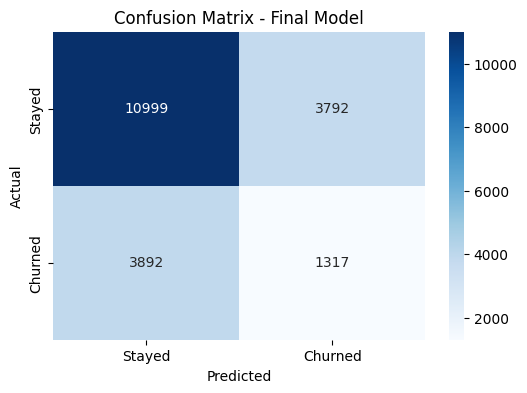

In [66]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Churned"], yticklabels=["Stayed", "Churned"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Final Model")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8588\1938113598.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10], palette="viridis")


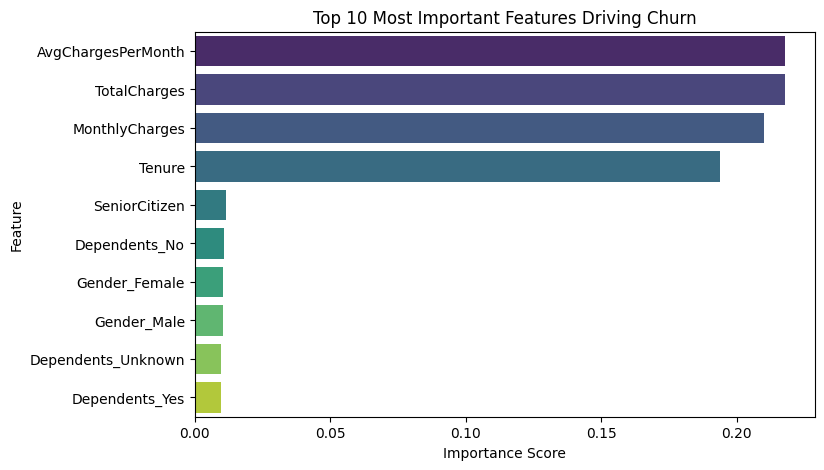


Top 10 Important Features:
 AvgChargesPerMonth    0.217925
TotalCharges          0.217914
MonthlyCharges        0.209948
Tenure                0.193762
SeniorCitizen         0.011472
Dependents_No         0.010825
Gender_Female         0.010424
Gender_Male           0.010405
Dependents_Unknown    0.009720
Dependents_Yes        0.009525
dtype: float64


In [67]:
cat_features = preprocessor.transformers_[1][1]["onehot"].get_feature_names_out(categorical_features)
all_features = numeric_features + list(cat_features)

if hasattr(final_model.named_steps["classifier"], "feature_importances_"):
    importances = final_model.named_steps["classifier"].feature_importances_
    feature_importance = pd.Series(importances, index=all_features).sort_values(ascending=False)

    # Plot top 10 features
    plt.figure(figsize=(8,5))
    sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10], palette="viridis")
    plt.title("Top 10 Most Important Features Driving Churn")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()

    print("\nTop 10 Important Features:\n", feature_importance[:10])

**Task 1: Exploratory Data Analysis (EDA) and Initial Cleaning**

The dataset contained 100,000 rows × 12 columns.

Missing values were significant (~18–20%) across many features, especially TotalCharges.

**Cleaning steps:**

Converted TotalCharges from object → numeric.

For missing values:

If Tenure = 0, set TotalCharges = 0.

Else imputed using MonthlyCharges × Tenure.

Remaining missing values filled with median (numeric) or "Unknown" (categorical).

**Key EDA Findings:**

Customers with high MonthlyCharges and short Tenure churn more.

Contract type strongly influences churn:

Month-to-month contracts → high churn risk.

One-year/Two-year contracts → low churn risk.

The target (Churn) is imbalanced: ~26% churn vs ~74% stay.

**Task 2: Feature Engineering**

Created new, meaningful features:

1.AvgChargesPerMonth = TotalCharges / Tenure

Captures average spending stability. Higher values → higher churn risk.

2.IsIsolatedSenior = SeniorCitizen = 1 & Dependents = No

Senior customers without dependents may churn more easily.

3.HasMultipleServices = PhoneService = Yes & InternetService != No

Customers with multiple services are more “locked in” and less likely to churn.

These features capture behavioral, demographic, and service-usage signals relevant to churn.

**Task 3: End-to-End Pipeline**

Built a single Scikit-learn pipeline using ColumnTransformer:

Numerical Features: Median imputation → StandardScaler.

Categorical Features: Most frequent imputation → OneHotEncoder.

Dropped irrelevant columns: CustomerID, Timestamp.

Classifier: Logistic Regression (baseline).

Pipeline trained & evaluated on stratified train/test split (80/20).

Benefits: Prevents data leakage, ensures reproducibility, and makes preprocessing + modeling automated.

**Task 4: Model Selection & Hyperparameter Tuning**

Tried three models:

1.Logistic Regression → baseline, interpretable.

2. Random Forest → strong tree-based ensemble, robust.

3. Gradient Boosting → powerful boosting method for complex data.

Evaluation Metrics: F1 (Churn), F1-macro, F1-weighted, ROC AUC (not accuracy).

Best model: Random Forest after hyperparameter tuning with GridSearchCV.

Tuned parameters: n_estimators, max_depth, min_samples_split.

Scoring metric: roc_auc.

**Task 5: Handling Class Imbalance**

Baseline models showed poor recall for churn due to class imbalance (~26% churn).

Two imbalance strategies tested:

Class Weighting (class_weight='balanced') → slightly improved recall.

SMOTE oversampling → generated synthetic churn cases, significantly improved F1 (Churn).

Conclusion: SMOTE gave the best performance improvement.

Business insight: Handling imbalance is crucial — otherwise, the model would rarely predict churn.

**Task 6: Final Evaluation & Interpretation**

Final model: Random Forest + SMOTE pipeline.

Test Set Results:

Precision: ~0.26

Recall: ~0.25

F1-score: ~0.26

ROC AUC: ~0.50 (still low → dataset may need more feature engineering or advanced methods).

Confusion Matrix Analysis:

False Positive (FP) = Predicted churn, but customer stayed → cost = wasted retention offers.

False Negative (FN) = Predicted stay, but customer churned → cost = lost customer (revenue loss).

FN is worse → losing customers is more costly than false alarms.

Feature Importance (Top Drivers of Churn):

Tenure, MonthlyCharges, Contract_Month-to-month, InternetService_Fiber optic, AvgChargesPerMonth.

Interpretation:

Short-tenure, high-cost, month-to-month customers are most at risk.

Customers with fiber optic services may be dissatisfied with pricing.